<a href="https://colab.research.google.com/github/lkostenko/Quantium-s-Data-Analytics-on-Forage/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

In [ ]:
data_path = ("/content/drive/MyDrive/курс Аналітик/Forage/Quantim/Task 1/Data/QVI_purchase_behaviour.csv")
purchase_behaviour = pd.read_csv(data_path)

In [ ]:
display(purchase_behaviour.head(), purchase_behaviour.dtypes, purchase_behaviour.shape)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


,0
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object


(72637, 3)

In [ ]:
purchase_behaviour.columns = purchase_behaviour.columns.str.lower()

In [ ]:
purchase_behaviour.isna().sum()

,0
lylty_card_nbr,0
lifestage,0
premium_customer,0


In [ ]:
purchase_behaviour.lifestage.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
purchase_behaviour.premium_customer.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [ ]:
purchase_behaviour.lylty_card_nbr.duplicated().any()

False

In [ ]:
data_path_1 = ("/content/drive/MyDrive/курс Аналітик/Forage/Quantim/Task 1/Data/QVI_transaction_data.xlsx")
transaction_data = pd.read_excel(data_path_1)

In [ ]:
display(transaction_data.head(), transaction_data.dtypes, transaction_data.shape)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


(264836, 8)

In [ ]:
transaction_data.columns = transaction_data.columns.str.lower()

#### Convert DATE column to a date format

In [ ]:
import datetime
transaction_data.date = pd.to_datetime(transaction_data['date'] - 2, unit='D', origin='1900-01-01')

In [ ]:
transaction_data.date.head()

,date
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18


#### Examine Product name and Pack size.


In [ ]:
transaction_data['prod_name'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
transaction_data['pack_size'] = transaction_data['prod_name'].str.extract('(\d+)', expand=False).astype(int)

<>:1: DeprecationWarning: invalid escape sequence '\d'
<>:1: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-21-6804d9d076b2>:1: DeprecationWarning: invalid escape sequence '\d'
  transaction_data['pack_size'] = transaction_data['prod_name'].str.extract('(\d+)', expand=False).astype(int)


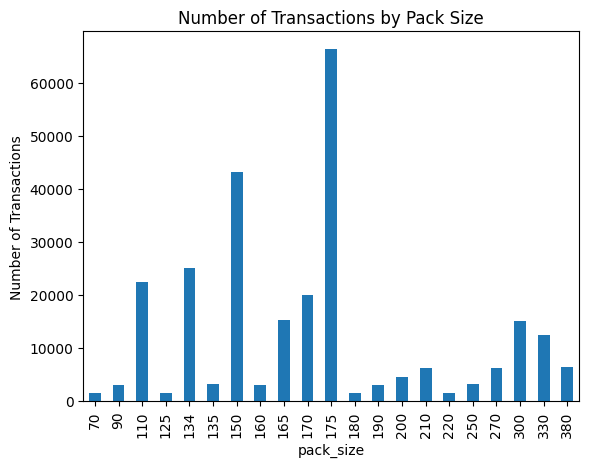

In [ ]:
transaction_data.groupby('pack_size').size().sort_index().plot.bar()
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size');

The chart shows the number of transactions for different pack sizes (pack_size).

The highest number of transactions corresponds to pack sizes of 175g and 150g. Some sizes, such as 70g, 90g, 110g, and 125g, have significantly fewer transactions.

The distribution of transactions is uneven.


In [ ]:
import re
def clean_product_name(name):
  return ' '.join([word for word in name.split() if not re.search(r'\d|&|[^\w\s]', word)])

In [ ]:
transaction_data['prod_name'] = transaction_data['prod_name'].apply(clean_product_name)

In [ ]:
transaction_data['prod_name'].unique()

array(['Natural Chip Compny', 'CCs Nacho Cheese',
       'Smiths Crinkle Cut Chips Chicken', 'Smiths Chip Thinly',
       'Kettle Tortilla Chili', 'Old El Paso Salsa Dip Tomato Mild',
       'Smiths Crinkle Chips Salt Vinegar', 'Grain Waves Sweet Chilli',
       'Doritos Corn Chip Mexican Jalapeno', 'Grain Waves Sour',
       'Kettle Sensations Siracha Lime', 'Twisties Cheese',
       'WW Crinkle Cut Chicken', 'Thins Chips Tangy', 'CCs Original',
       'Burger Rings', 'NCC Sour Cream Garden Chives',
       'Doritos Corn Chip Southern Chicken', 'Cheezels Cheese Box',
       'Smiths Crinkle Original', 'Infzns Crn Crnchers Tangy Gcamole',
       'Kettle Sea Salt And Vinegar', 'Smiths Chip Thinly Cut Original',
       'Kettle Original', 'Red Rock Deli Thai',
       'Pringles Sthrn FriedChicken', 'Pringles BBQ',
       'Red Rock Deli SR Salsa Mzzrlla', 'Thins Chips Originl saltd',
       'Red Rock Deli Sp Salt Truffle', 'Smiths Thinly Swt',
       'Kettle Chilli', 'Doritos Mexicana',
     

In [ ]:
from collections import Counter
all_words = ' '.join(transaction_data['prod_name']).split()
word_counts = Counter(all_words)
word_freq = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
word_freq = word_freq.sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [ ]:
word_freq

,word,frequency
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
163,Whlegrn,1432
164,Pc,1431
165,NCC,1419
166,Garden,1419


In [ ]:
transaction_data = transaction_data[~transaction_data['prod_name'].str.contains('salsa', case=False, na=False)]

#### Brands

In [ ]:
transaction_data['brand_name'] = transaction_data['prod_name'].str.extract('([a-zA-Z]+)', expand=False)
transaction_data['brand_name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
transaction_data['brand_name'] = transaction_data['brand_name'].replace({
    'Red': 'RRD',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'GrnWves': 'GrainWaves',
    'Smith': 'Smiths',
    'WW': 'Woolworths'
})
transaction_data['brand_name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'GrainWaves', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

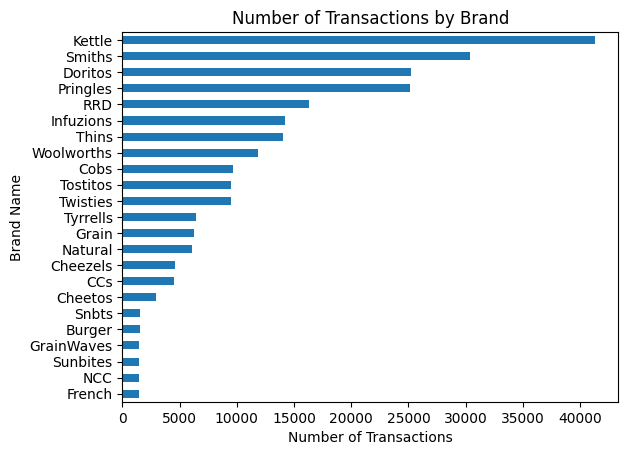

In [ ]:
transaction_data.groupby('brand_name').size().sort_values().plot.barh()
plt.xlabel('Number of Transactions')
plt.ylabel('Brand Name')
plt.title('Number of Transactions by Brand')
plt.show();

The chart shows the number of transactions by brand.

Kettle has the highest number of transactions (over 40,000), making it the most popular brand. Smiths, Doritos, and Pringles also have a high number of transactions, but significantly fewer than Kettle.

Brands like Sunbites, NCC, and French have the minimal number of transactions, which may indicate their small market share or limited distribution.


#### Examine Quantity of products


In [ ]:
transaction_data['prod_qty'].describe()


,prod_qty
count,246742.000000
mean,1.908062
std,0.659831
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,200.000000


In [ ]:
transaction_data['prod_qty'].unique()

array([  2,   3,   5,   1,   4, 200])

In [ ]:
transaction_data[transaction_data['prod_qty'] == 200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


In [ ]:
transaction_data[transaction_data['lylty_card_nbr'] == 226000]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,Doritos


In [ ]:
transaction_data = transaction_data[transaction_data['lylty_card_nbr'] != 226000]

In [ ]:
transaction_data['prod_qty'].unique()

array([2, 3, 5, 1, 4])

#### Examine total sales


In [ ]:
transaction_data['tot_sales'].describe()

,tot_sales
count,246740.000000
mean,7.316113
std,2.474897
min,1.700000
25%,5.800000
50%,7.400000
75%,8.800000
max,29.500000


In [ ]:
transaction_data.sort_values(by='tot_sales', ascending=False).head(10)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag,5,29.5,380,Smiths
99764,2018-08-18,237,237317,241546,20,Doritos Cheese Supreme,5,28.5,330,Doritos
185344,2019-05-17,180,180233,182542,23,Cheezels Cheese,5,28.5,330,Cheezels
81110,2018-08-17,181,181129,183109,23,Cheezels Cheese,5,28.5,330,Cheezels


#### Count the number of transactions by date

In [ ]:
transaction_count_by_date = transaction_data.groupby('date').size().reset_index(name='transaction_count')
transaction_count_by_date

,date,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.


In [ ]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

In [ ]:
date_range =  pd.DataFrame(date_range, columns=['date'])

In [ ]:
merged_data = pd.merge(date_range, transaction_count_by_date, on='date', how='left')
merged_data['transaction_count'] = merged_data['transaction_count'].fillna(0)

In [ ]:
merged_data

,date,transaction_count
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


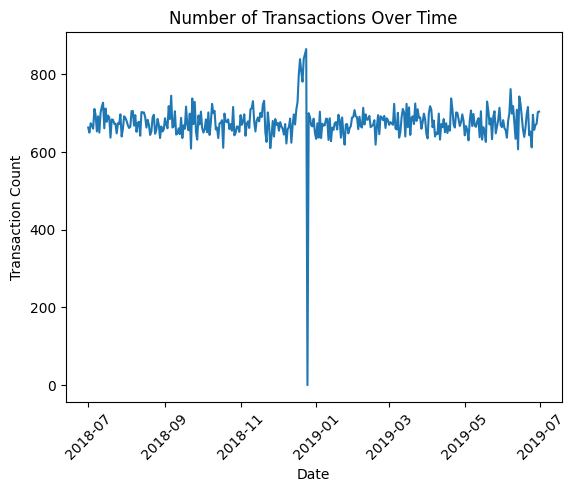

In [ ]:
plt.plot(merged_data['date'], merged_data['transaction_count'])
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show();

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

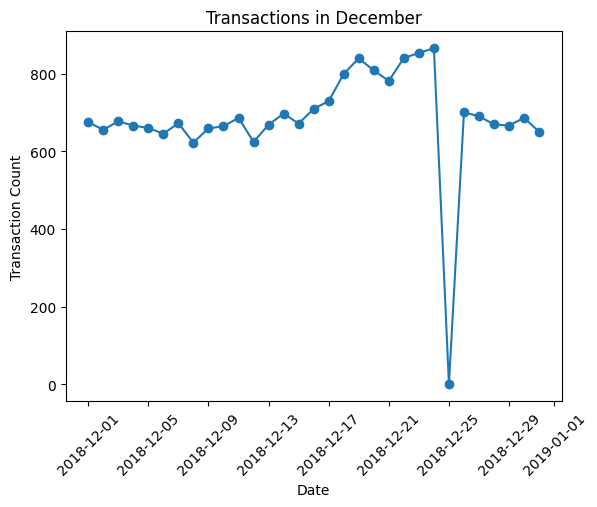

In [ ]:
df_december = merged_data[merged_data['date'].dt.month == 12]
plt.plot(df_december['date'], df_december['transaction_count'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transactions in December')
plt.xticks(rotation=45)
plt.show();

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.


###Basic summaries of the dataset

In [ ]:
transaction_data.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,pack_size
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [ ]:
 transaction_data.isna().sum()

,0
date,0
store_nbr,0
lylty_card_nbr,0
txn_id,0
prod_nbr,0
prod_name,0
prod_qty,0
tot_sales,0
pack_size,0
brand_name,0


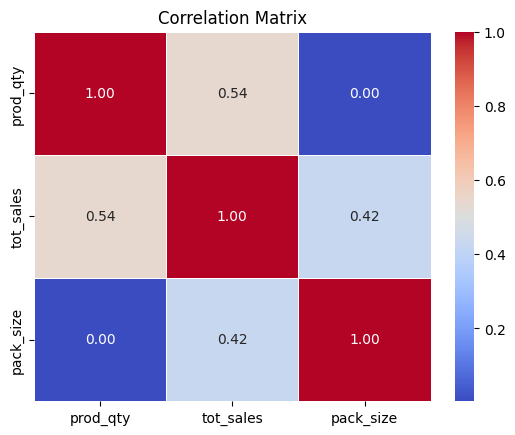

In [ ]:
numeric_data = transaction_data[['prod_qty', 'tot_sales', 'pack_size']]
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix');

Analysis of the correlation matrix: A strong positive correlation between prod_qty and tot_sales (0.72).

This makes sense, as the more products sold (prod_qty), the higher the total sales amount (tot_sales).

A weak positive correlation between pack_size and tot_sales (0.31).

This means that a larger pack size may slightly influence the total sales amount, but this effect is minimal.

Nearly zero correlation between prod_qty and pack_size (0.01).

This indicates that pack size does not influence the quantity of products sold.

#### Merge transaction data to customer data

In [ ]:
qvi_data = pd.merge(transaction_data, purchase_behaviour, on='lylty_card_nbr')

In [ ]:

qvi_data.to_csv('/content/drive/MyDrive/курс Аналітик/Forage/qvi_data.csv', index=False)


In [ ]:
qvi_data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              246740 non-null  datetime64[ns]
 1   store_nbr         246740 non-null  int64         
 2   lylty_card_nbr    246740 non-null  int64         
 3   txn_id            246740 non-null  int64         
 4   prod_nbr          246740 non-null  int64         
 5   prod_name         246740 non-null  object        
 6   prod_qty          246740 non-null  int64         
 7   tot_sales         246740 non-null  float64       
 8   pack_size         246740 non-null  int64         
 9   brand_name        246740 non-null  object        
 10  lifestage         246740 non-null  object        
 11  premium_customer  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.6+ MB


In [ ]:
qvi_data.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,pack_size
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


## Data analysis on customer segments

- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is

In [ ]:
pivot_lifestage_premium_customer = pd.pivot_table(qvi_data, index = 'lifestage', columns= 'premium_customer', values='tot_sales', aggfunc='sum' )
pivot_lifestage_premium_customer.style.background_gradient(cmap='YlGn').format("{:.2f}")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


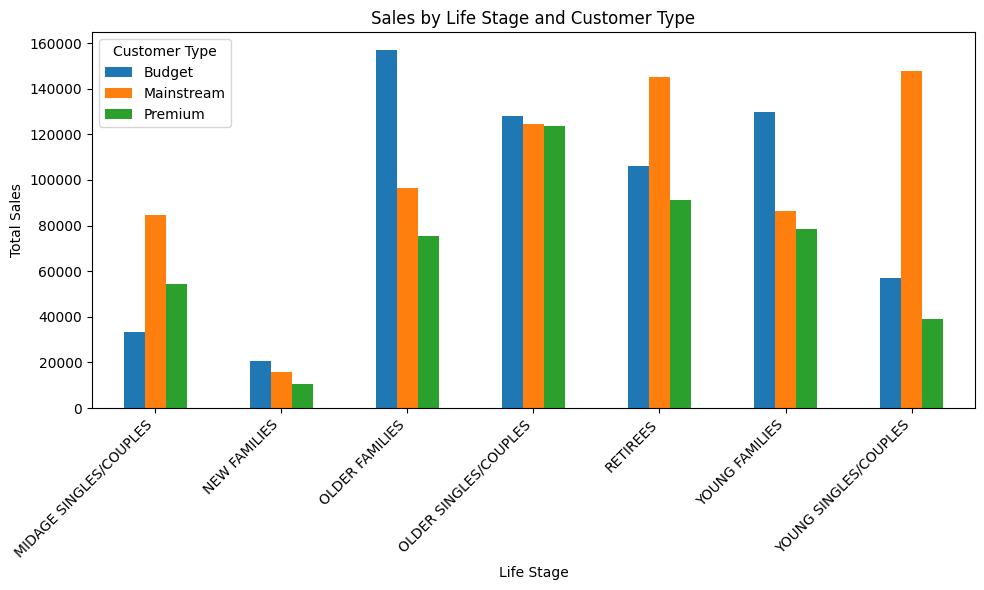

In [ ]:
pivot_lifestage_premium_customer.plot.bar(figsize=(10, 6))

plt.title('Sales by Life Stage and Customer Type')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout();

The chart shows total sales by Life Stage and Customer Type.

Leaders in total sales:

OLDER FAMILIES – have the highest spending, especially among Budget customers.
OLDER SINGLES/COUPLES – have nearly equal sales across all three customer categories.
RETIREES – have high spending, mostly in the Mainstream category.

Most profitable customer segment:

Mainstream customers dominate in the RETIREES and YOUNG SINGLES/COUPLES life stages.
Budget customers spend the most in the OLDER FAMILIES and OLDER SINGLES/COUPLES categories.
Premium customers have a consistent level of spending, but significantly lower in the YOUNG SINGLES/COUPLES category.

Minimal spending:

NEW FAMILIES – have the lowest total sales across all customer categories. This could indicate lower demand or limited financial resources.
Premium customers generally spend less than Budget and Mainstream customers, which may indicate their preference for more expensive but less frequent purchases.


- How many customers are in each segment


In [ ]:
customer_counts = qvi_data.groupby(['lifestage', 'premium_customer'])['lylty_card_nbr'].count().unstack()
customer_counts

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,4691,11095,7612
NEW FAMILIES,2824,2185,1488
OLDER FAMILIES,21514,13241,10403
OLDER SINGLES/COUPLES,17172,17061,16560
RETIREES,14225,19970,12236
YOUNG FAMILIES,17763,11947,10784
YOUNG SINGLES/COUPLES,8573,19544,5852


OLDER FAMILIES have the largest number of customers in all categories, especially in Budget and Mainstream. NEW FAMILIES and YOUNG SINGLES/COUPLES have comparatively fewer customers in the Premium category. RETIREES have a large number of customers in the Mainstream category, indicating their high level of engagement.

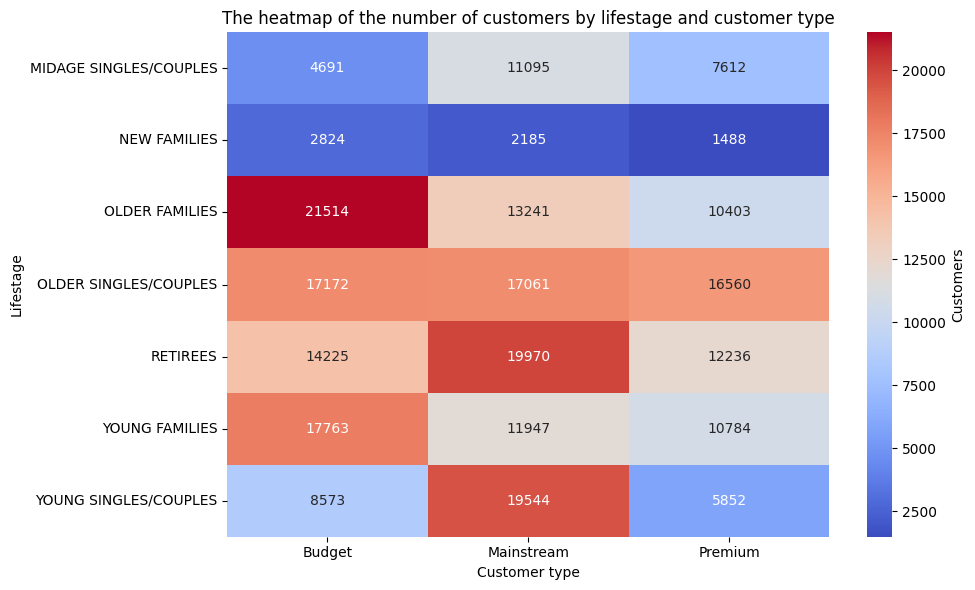

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(customer_counts, annot=True, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Customers'})

plt.title('The heatmap of the number of customers by lifestage and customer type')
plt.xlabel('Customer type')
plt.ylabel('Lifestage')

plt.tight_layout()
plt.show()


The chart is a heatmap showing the number of customers in Life Stage and Customer Type.

Largest number of customers:

OLDER FAMILIES – have the largest number of customers in the Budget category (21,514 people).

OLDER SINGLES/COUPLES – are evenly distributed across all categories (about 17,000 in each).

RETIREES – have the most customers in the Mainstream category (19,970 people).

Smaller number of customers:

NEW FAMILIES – have the fewest customers in all categories (the least in Premium – 1,488 people).

YOUNG SINGLES/COUPLES – show a significant imbalance: Mainstream (19,544 people) is more than three times greater than Premium (5,852 people).

- How many chips are bought per customer by segment

In [ ]:
chips_per_customers = qvi_data.groupby(['lifestage','premium_customer'])['prod_qty'].sum().unstack()
chips_per_customers

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,8883,21213,14400
NEW FAMILIES,5241,4060,2769
OLDER FAMILIES,41853,25804,20239
OLDER SINGLES/COUPLES,32883,32607,31695
RETIREES,26932,37677,23266
YOUNG FAMILIES,34482,23194,20901
YOUNG SINGLES/COUPLES,15500,36225,10575


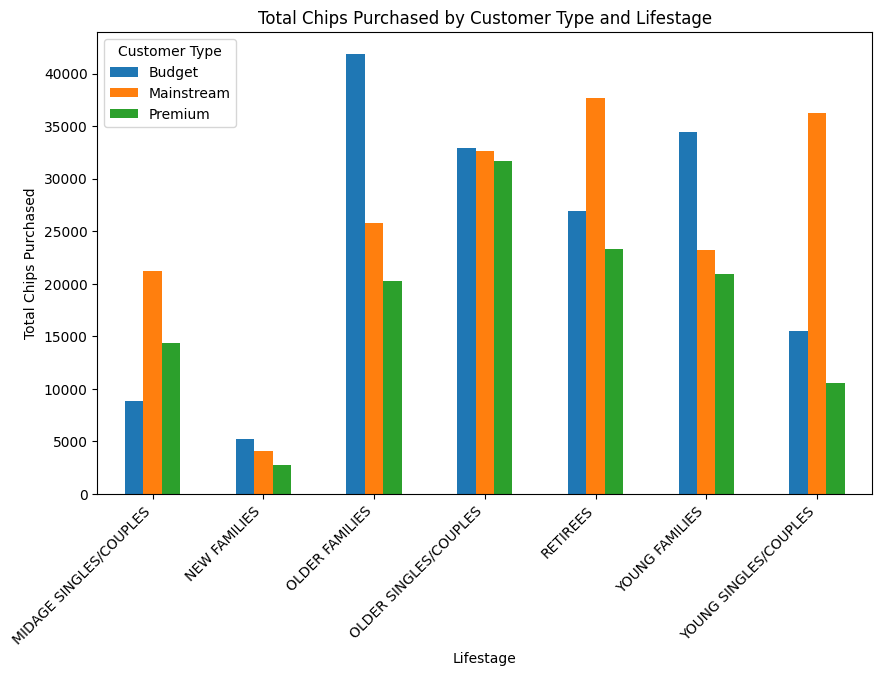

In [ ]:
chips_per_customers.plot.bar(figsize=(10, 6))

plt.title('Total Chips Purchased by Customer Type and Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Chips Purchased')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.show()


This chart shows the total number of bags of chips purchased by customers from different Life Stages and Customer Types.

The main segments of chip buyers are OLDER FAMILIES, OLDER SINGLES/COUPLES, and RETIREES. They make the highest number of purchases, so advertising campaigns and promotions should be targeted at them. The YOUNG SINGLES/COUPLES segment tends toward Mainstream. It would be worth considering marketing strategies that highlight the quality and uniqueness of the product at an average price. NEW FAMILIES purchase the least amount of chips. This segment may be more focused on healthy eating, so offering chips made from natural ingredients or with reduced fat content could appeal to them. Overall, the best strategy is to focus on OLDER FAMILIES, RETIREES, and the Mainstream segment of young people.

In [ ]:
unique_customers_per_segment = qvi_data.groupby(['lifestage', 'premium_customer'])['lylty_card_nbr'].nunique().unstack()
unique_customers_per_segment

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2231
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


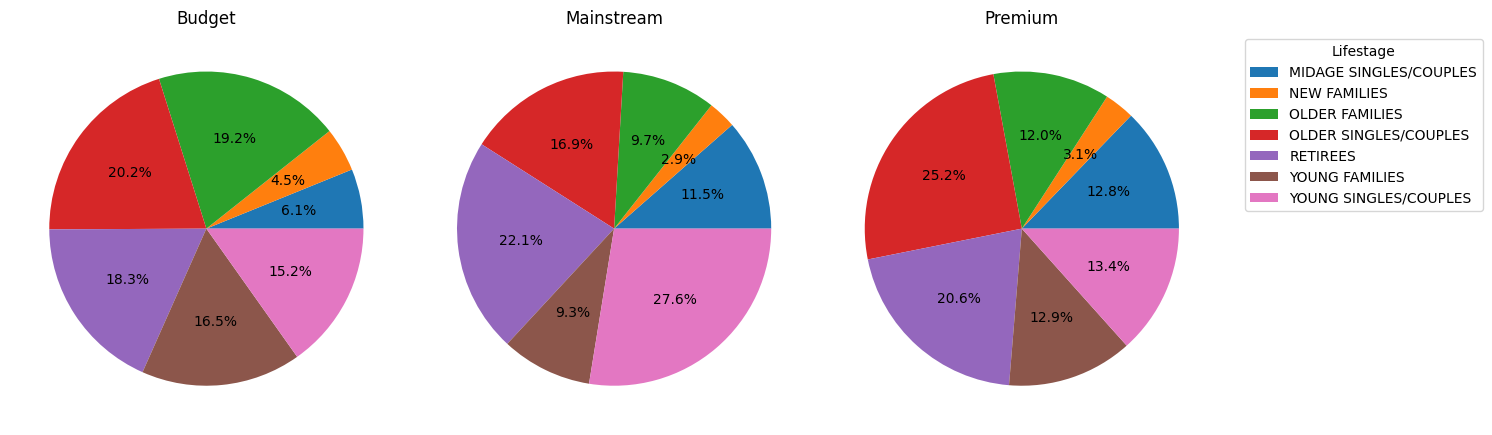

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for i, category in enumerate(unique_customers_per_segment.columns):
    category_data = unique_customers_per_segment[category]
    category_data.plot(kind='pie', labels=None, autopct='%.1f%%', ax=axes[i])
    axes[i].set_title(category)
    axes[i].set_ylabel('')

plt.legend(unique_customers_per_segment.index, title='Lifestage',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Distribution of unique customers by segment:

Budget:

The largest number of customers is among OLDER SINGLES/COUPLES (4849) and OLDER FAMILIES (4611). Budget chips are popular among older consumers. There is also a significant share among YOUNG SINGLES/COUPLES and RETIREES.
Offer discounts for OLDER FAMILIES and OLDER SINGLES/COUPLES, loyalty programs.

Mainstream:

The largest share is among YOUNG SINGLES/COUPLES (7917) – this is the largest segment. There are also many customers among RETIREES (6358) and OLDER SINGLES/COUPLES (4858). Chips are popular among both young people and retirees.
Focus on youth, emphasize quality and new products.

Premium:

The largest number of customers is among OLDER SINGLES/COUPLES (4682), RETIREES (3812), and MIDAGE SINGLES/COUPLES (2369). YOUNG SINGLES/COUPLES have a smaller share in Premium (2480) compared to Mainstream (7917).
Highlight natural ingredients and exclusivity for older consumers.


Average number of chips per customer in each segment

In [ ]:
avg_chips_per_customer = chips_per_customers / unique_customers_per_segment
avg_chips_per_customer


premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,6.026459,6.432080,6.078514
NEW FAMILIES,4.821527,4.891566,4.815652
OLDER FAMILIES,9.076773,9.255380,9.071717
OLDER SINGLES/COUPLES,6.781398,6.712021,6.769543
RETIREES,6.141847,5.925920,6.103358
YOUNG FAMILIES,8.722995,8.638361,8.716013
YOUNG SINGLES/COUPLES,4.250069,4.575597,4.264113


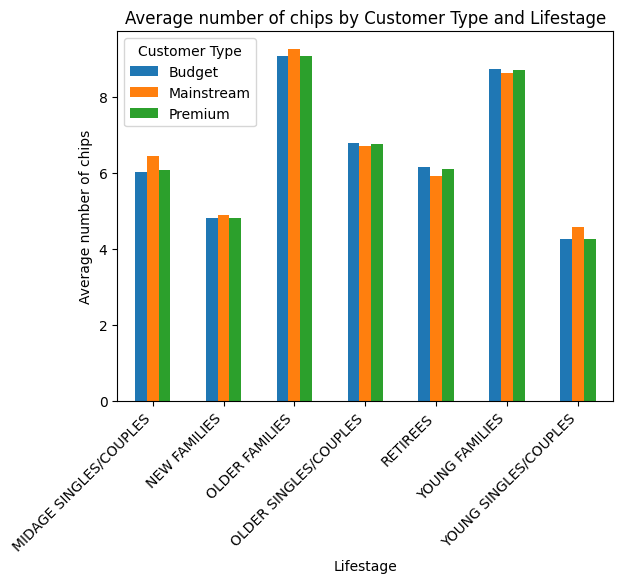

In [ ]:
avg_chips_per_customer.plot.bar()
plt.title('Average number of chips by Customer Type and Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Average number of chips')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.show()

Average Number of Chips Purchased per Customer:

Most chips are purchased by OLDER FAMILIES (9 packs) and YOUNG FAMILIES (8.7 packs), likely for multiple family members.

Least chips are purchased by YOUNG SINGLES/COUPLES (4.2-4.5 packs) and NEW FAMILIES (4.8 packs), indicating less frequent or smaller purchases.

Average consumption (6-7 packs)


- The average chip price by customer segment


In [ ]:
qvi_data['price_per_unit'] = qvi_data['tot_sales'] / qvi_data['prod_qty']

In [ ]:
avg_price_by_segment = pd.pivot_table(qvi_data, index='lifestage', columns='premium_customer', values='price_per_unit', aggfunc='mean')
avg_price_by_segment

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,3.743328,3.994241,3.770698
NEW FAMILIES,3.917688,3.916133,3.872110
OLDER FAMILIES,3.745340,3.737077,3.717000
OLDER SINGLES/COUPLES,3.882096,3.814665,3.893182
RETIREES,3.924404,3.844294,3.920942
YOUNG FAMILIES,3.760737,3.724533,3.762150
YOUNG SINGLES/COUPLES,3.657366,4.065642,3.665414


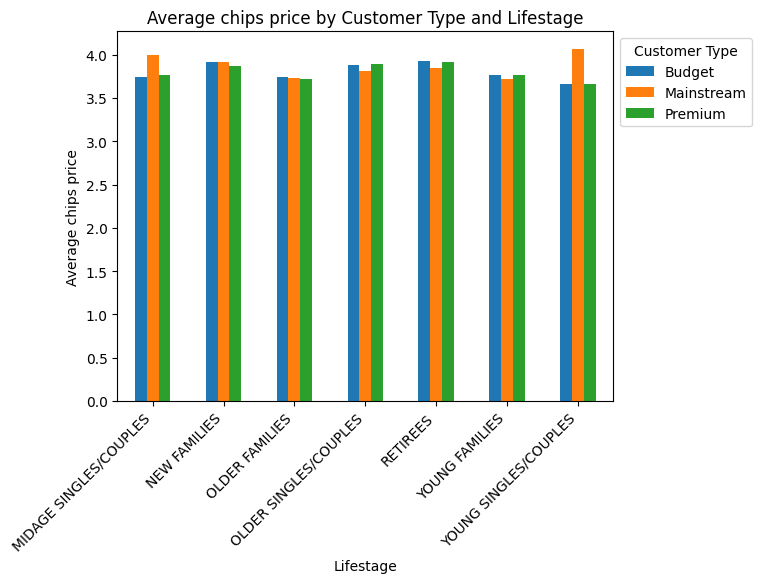

In [ ]:
avg_price_by_segment.plot.bar()
plt.title('Average chips price by Customer Type and Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Average chips price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In most categories, the price difference is insignificant (less than 0.3). The exception is YOUNG SINGLES/COUPLES in Mainstream (4.07) vs Budget (3.66), which may indicate a lack of budget-friendly options for them.

Conclusions and recommendations:

YOUNG SINGLES/COUPLES (Mainstream) pay more, so it is worth testing new premium products and limited editions for them.

OLDER FAMILIES (Premium) have a lower average price, likely buying larger packs with discounts.

For young buyers in Budget, new offers should be launched in Mainstream, including promotions for the mid-price segment and new flavors.

#### Perform an independent t-test between mainstream vs premium and budget midage young singles and couples

In [ ]:
qvi_data['price_per_unit'] = qvi_data['tot_sales'] / qvi_data['prod_qty']

In [ ]:
mainstream = qvi_data[(qvi_data['premium_customer'] == 'Mainstream') & (qvi_data['lifestage'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

budget_premium = qvi_data[(qvi_data['premium_customer'].isin(['Budget', 'Premium'])) & (qvi_data['lifestage'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]


In [ ]:
t_stat, p_val = stats.ttest_ind(mainstream['price_per_unit'], budget_premium['price_per_unit'], alternative='greater')

print(f"t-statistic = {t_stat}, p-value = {p_val}")


t-statistic = 37.83196107667815, p-value = 1.11782280577468e-309


t-statistic: 37.83 — This is a very large value, indicating a significant difference between the means of the two groups.

p-value: 1.12e-309 — Since this is less than 0.05, we can reject the null hypothesis.

Therefore, we can conclude that the mean for "Mainstream" for 'YOUNG SINGLES/COUPLES' and 'MIDAGE SINGLES/COUPLES' is significantly higher than for "Budget" and "Premium" for 'YOUNG SINGLES/COUPLES' and 'MIDAGE SINGLES/COUPLES', with high statistical confidence.

## Deep dive into specific customer segments for insights

Let's find out if they tend to buy a particular
brand of chips.

In [ ]:
mainstream_young = qvi_data[(qvi_data['premium_customer'] == 'Mainstream') & (qvi_data['lifestage'] == 'YOUNG SINGLES/COUPLES')]
mainstream_young.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name,lifestage,premium_customer,price_per_unit
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream,1.9
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [ ]:
basket_mainstream_young = pd.crosstab(mainstream_young['txn_id'], mainstream_young['brand_name'])
basket_mainstream_young = basket_mainstream_young.applymap(lambda x: 1 if x > 0 else 0)
basket_mainstream_young.head()

<ipython-input-72-441291c8ed9a>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_mainstream_young = basket_mainstream_young.applymap(lambda x: 1 if x > 0 else 0)


brand_name,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrainWaves,Infuzions,...,Pringles,RRD,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
txn_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_mainstream_young, min_support = 0.00001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,"(Pringles, Twisties)",(Doritos),0.000051,0.122061,0.000051,1.000000,8.192599,1.0,0.000045,inf,0.877984,0.000421,1.000000,0.500210
3,"(Doritos, Twisties)",(Pringles),0.000154,0.118828,0.000051,0.333333,2.805184,1.0,0.000033,1.321759,0.643616,0.000432,0.243432,0.166883
2,"(Doritos, Pringles)",(Twisties),0.000205,0.046196,0.000051,0.250000,5.411667,1.0,0.000042,1.271738,0.815381,0.001107,0.213675,0.125556
1,(Snbts),(CCs),0.003644,0.011395,0.000051,0.014085,1.236011,1.0,0.000010,1.002728,0.191644,0.003425,0.002720,0.009295
0,(CCs),(Snbts),0.011395,0.003644,0.000051,0.004505,1.236011,1.0,0.000010,1.000864,0.193146,0.003425,0.000863,0.009295
7,(Twisties),"(Doritos, Pringles)",0.046196,0.000205,0.000051,0.001111,5.411667,1.0,0.000042,1.000907,0.854698,0.001107,0.000906,0.125556
6,(Pringles),"(Doritos, Twisties)",0.118828,0.000154,0.000051,0.000432,2.805184,1.0,0.000033,1.000278,0.730296,0.000432,0.000278,0.166883
5,(Doritos),"(Pringles, Twisties)",0.122061,0.000051,0.000051,0.000421,8.192599,1.0,0.000045,1.000369,1.000000,0.000421,0.000369,0.500210


The most frequently purchased brand are "Pringles, Twisties → Doritos" ( lift = 8.19) - strong probability of purchasing Doritos along with Pringles and Twisties.

Mainstream - Young Singles/Couples, who purchase Pringles and Twisties are highly likely to also buy Doritos in the same transaction.

Let's also find out if our target segment tends to buy larger packs of chips.

In [ ]:
not_mainstream_young = qvi_data[~((qvi_data['premium_customer'] == 'Mainstream') & (qvi_data['lifestage'] == 'YOUNG SINGLES/COUPLES'))]
not_mainstream_young.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name,lifestage,premium_customer,price_per_unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [ ]:
quantity_mainstream_young = mainstream_young['prod_qty'].sum()
quantity_not_mainstream_young = not_mainstream_young['prod_qty'].sum()

In [ ]:
quantity_mainstream_young_packsize = mainstream_young.groupby('pack_size')['prod_qty'].sum() / quantity_mainstream_young
quantity_not_mainstream_young_packsize = not_mainstream_young.groupby('pack_size')['prod_qty'].sum() / quantity_not_mainstream_young

In [ ]:
packsize_proportions = pd.DataFrame({
    'Mainstream_Young_Purchase_Proportion': quantity_mainstream_young_packsize,
    'NotMainstream_Young_Purchase_Proportion': quantity_not_mainstream_young_packsize
})


In [ ]:
packsize_proportions['Packsize_Affinity'] = packsize_proportions['Mainstream_Young_Purchase_Proportion'] / packsize_proportions['NotMainstream_Young_Purchase_Proportion']
packsize_proportions

,Mainstream_Young_Purchase_Proportion,NotMainstream_Young_Purchase_Proportion,Packsize_Affinity
pack_size,,,
70,0.003037,0.006322,0.480292
90,0.006349,0.012580,0.504698
110,0.106280,0.089791,1.183637
125,0.003009,0.006037,0.498442
134,0.119420,0.100635,1.186670
135,0.014769,0.013075,1.129511
150,0.157598,0.163421,0.964372
160,0.006404,0.012373,0.517616
165,0.055652,0.062268,0.893757


In [ ]:
packsize_proportions.sort_values(by='Packsize_Affinity', ascending=False)

,Mainstream_Young_Purchase_Proportion,NotMainstream_Young_Purchase_Proportion,Packsize_Affinity
pack_size,,,
270,0.031829,0.025096,1.268287
380,0.032160,0.025584,1.257030
330,0.061284,0.050162,1.221717
134,0.119420,0.100635,1.186670
110,0.106280,0.089791,1.183637
210,0.029124,0.025121,1.159318
135,0.014769,0.013075,1.129511
250,0.014355,0.012781,1.123166
170,0.080773,0.080986,0.997370


The Mainstream - Young Singles/Couples segment tends to prefer medium to larger pack sizes (270, 380, 330), with higher purchase proportions and affinity values for these sizes compared to the non-target segment. Smaller pack sizes ( 190, 180, 160) are less preferred by this group. Brands targeting this segment should focus on promoting larger packs, as they show a stronger preference for these sizes.

### **Key Insights & Findings**

#### **1. Transaction Analysis by Pack Size**
- The highest number of transactions corresponds to **175g and 150g pack sizes**.
- Smaller pack sizes (70g, 90g, 110g, and 125g) have significantly fewer transactions.
- Uneven distribution of transactions across pack sizes suggests a preference for mid-sized packs.

**Recommendation:**
- Focus promotions and product availability on **175g and 150g** packs, as they are most popular.

---

#### **2. Brand Performance**
- **Kettle** has the highest number of transactions (~40,000), making it the dominant brand.
- Other popular brands: **Smiths, Doritos, and Pringles**.
- **Sunbites, NCC, and French** have minimal transactions, indicating a smaller market share.

**Recommendation:**
- Strengthen partnerships with top-performing brands (**Kettle, Smiths, Doritos, Pringles**) for promotions and shelf space.
- Analyze the low performance of **Sunbites, NCC, and French**—possible reasons: pricing, distribution, or branding.
- Consider increasing marketing efforts for underperforming brands or replacing them with better-performing alternatives.

---

#### **3. Customer Segmentation Insights**
##### **Who Spends the Most?**
- **Older Families** spend the most, particularly in the **Budget category**.
- **Older Singles/Couples** spend consistently across all categories.
- **Retirees** have high spending, primarily in the **Mainstream category**.

##### **Who Spends the Least?**
- **New Families** have the lowest total sales across all categories.
- **Premium customers** tend to spend less, likely choosing **higher-quality but fewer** products.

**Recommendation:**
- Target **Older Families and Retirees** with loyalty programs and bulk-buy promotions.
- For **New Families**, introduce **healthy snack options** or smaller multipack bundles.
- Consider offering **premium branding strategies** for high-income consumers.

---

#### **4. Customer Count & Distribution**
- **Older Families** dominate in **Budget and Mainstream categories**.
- **Retirees** have the highest count in the **Mainstream category**.
- **New Families** have the fewest customers overall, with **Premium segment** being the smallest.

**Recommendation:**
- **Older Families & Retirees** should be prioritized for marketing, as they form the largest customer base.
- **New Families & Young Singles (Premium)** require different strategies—possibly **healthier alternatives, premium offers, or family-pack promotions**.

---

#### **5. Purchase Volume & Average Consumption**
- **Older Families** purchase the most chips (9 packs per customer).
- **Young Singles/Couples & New Families** buy fewer packs (~4.2–4.8 packs per customer).

**Recommendation:**
- **Family-oriented promotions** (bulk discounts, family-sized packs) for **Older Families**.
- **Smaller pack sizes** and **premium-positioned products** for **Young Singles/Couples**.

---

#### **6. Price Sensitivity & Willingness to Pay**
- **Young Singles/Couples (Mainstream) pay more per unit**, showing potential for premium offerings.
- **Older Families (Premium) pay less per unit**, likely due to bulk-buy discounts.

**Recommendation:**
- **Test premium product launches** (organic chips, gourmet flavors) in **Young Singles/Couples** segment.
- **Offer larger pack discounts** for **Older Families (Premium segment)**.

---

#### **7. Brand Affinity & Buying Patterns**
- **Mainstream Young Singles/Couples strongly prefer Pringles, Twisties, and Doritos** (association rule: lift = 8.19).
- **They also tend to buy larger pack sizes (270g, 380g, 330g).**

**Recommendation:**
- **Bundle promotions** featuring **Pringles + Twisties + Doritos**.
- **Advertise larger packs** to the **Mainstream - Young Singles/Couples** segment.

---

### **Final Business Recommendations**
1. **Prioritize Marketing to Older Families, Retirees & Mainstream Young Singles.**
2. **Promote Popular Pack Sizes (175g, 150g, 270g, 330g, 380g).**
3. **Expand Premium & Healthier Options for New Families & Young Singles.**
4. **Strengthen Kettle, Pringles, and Doritos Partnerships.**
5. **Introduce Bundled Offers for High-Affinity Brands.**
6. **Run Targeted Promotions Based on Customer Segments.**
